In [29]:
from matplotlib import pyplot as plt
import nibabel as nib
import numpy as np
import torch
from torch.utils.data import DataLoader
import tqdm

from config import get_config
from unet import UNet

In [30]:
def loss(output, target):
    return torch.nn.functional.mse_loss(output, target)

def train_loop(dataloader, model, loss_fn, optimizer, num_epochs=10):
    total_loss = np.inf
    pbar = tqdm.tqdm(range(num_epochs), desc=f'Loss = {total_loss:.6f} | Epochs')
    for _ in pbar:
        total_loss = 0
        for data in dataloader:
            pred = model(data)
            loss = loss_fn(pred, data)
            total_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        pbar.set_description(f'Loss = {total_loss:.6f} | Epochs')

In [31]:
config = get_config()
unet_model = UNet(
    input_irreps=config.input_irreps,
    output_irreps=config.output_irreps,
    diameter=config.diameter,
    num_radial_basis=config.num_radial_basis,
    steps=config.steps,
    n_downsample=config.n_downsample,
    scalar_upsampling=config.scalar_upsampling,
).to(config.device)

In [34]:
stripes_x = np.load("/home/songk/6.7960-final-project/stripes_x_20x20.npy")

In [36]:
input_img = stripes_x.astype(np.float32)
input_img = np.expand_dims(input_img, axis=0)
input_img = np.expand_dims(input_img, axis=0)
input_img = torch.from_numpy(input_img).to(config.device)
dataloader = DataLoader(input_img, batch_size=1, shuffle=True)

In [47]:
train_loop(dataloader, unet_model, loss, torch.optim.Adam(unet_model.parameters()), num_epochs=100)

Loss = 0.177660 | Epochs: 100%|██████████| 100/100 [00:14<00:00,  6.89it/s]


In [48]:
def viewer(image,x,y,z):
    plt.gray()
    plt.subplot(221)
    plt.imshow(np.flip(image[:,:,z].transpose()),aspect=x/y)
    plt.subplot(222)
    plt.imshow(np.flip(image[x,:,:].transpose()),aspect =y/z)
    plt.subplot(224)
    plt.imshow(np.flip(image[:,y,:].transpose()),aspect=x/z)
    plt.show()

In [49]:
x = 10
y = 10
z = 10

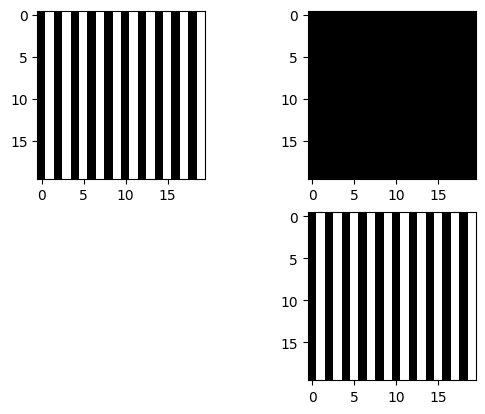

In [50]:
viewer(input_img[0,0].cpu().numpy(), x, y, z)

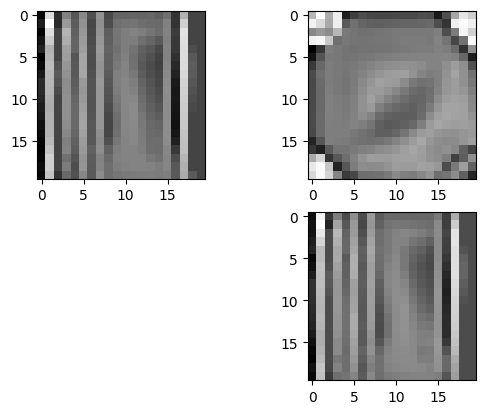

In [51]:
viewer(unet_model(input_img).cpu().detach().numpy()[0, 0], x, y, z)